<h1> This is a statistical tool to analyze the "scaling property" in English courpus </h1><p>

<font color='red' size='4'> funtionalities: </font><p>
<font color='blue' size='4'>1. <b>info(filename, encode) </b><br></font>
the core function that give you data frame to make statistics<br>

input: <br>
filename : a txt file with its name <br>
encode : the encode of your txt file, the default is 'UTF-8' <p>

output: <br>
big : a dataframe contain words and its compositions <br>
syl : a dataframe contain the information of syllables <br>
word : a dataframe contain the information of words <br>
longest : the longest length of single word <p>

example: <br>
big, syl, word, longest = info('forg.txt', encode) <p>

<font color='blue' size='4'>2. <b>count_col(word, syl) </b><br></font>
Using count_col function to count collocations and links of syllables and words <br>
Read details in count_col.py <p>


<font color='blue' size='4'>3. <b>check ratio of geometric sequence {$H_n$} and {$V_n$} </b><br></font>
<font color='blue' size='4'>4. <b>draw RRD plot </b><br></font>
<font color='blue' size='4'>5. <b>draw FRD plot of words and syllables </b><br></font>
<font color='blue' size='4'>6. <b>draw collocation-rank plot </b><br></font>
<font color='blue' size='4'>7. <b>draw link-rank plot </b><br></font>
<font color='blue' size='4'>8. <b>draw collocation mapping (y->y') </b><br></font>
(in development) <br>
<font color='blue' size='4'>9. <b>draw link mapping (x->x') </b><br></font>
(in development) <br>
<font color='blue' size='4'>10. <b>draw collocation distribution plot </b><br></font>
<font color='blue' size='4'>11. <b>draw link distribution plot </b><br></font>
<font color='blue' size='4'>12. <b>draw Heap's law </b><br></font>

In [1]:
import time
import random 
import bisect 
import math 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from Module.count import *
from Module.count_col import *
from Module.Curve_Fitting_MLE import *
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
#encode = "UTF-16" #(1)
encode = "UTF-8"   #(2)
##if anything gets into trouble, use (1) instead of (2), and vise versa.
name = 'Moby-Dick'
filename = name + '.txt' #change filename if you want to get statictical information of another

In [3]:
##text file.
big, syl, word, longest = info(filename, encode)
count_col(word, syl)

read file successfully!
Successfully count word freqency!(Moby-Dick.txt)
Successfully count syl freqency!
Successfully build data frames!


In [4]:
#save file, read detials in count.py
#write_to_excel(big, word, syl, name)

<font color='blue' size='4'><b>check ratio of geometric sequence {$H_n$} </b><br></font>

In the function <font color='blue'>which_plot(x = 'H', savefig = 'png')</font>, you can change the following parameters:<br>

1. max_range: number<br>
    the number of elements in the sequence you want to know<br>

2. x: 'H' or 'V'<br>
    you can chose the sequence you want (H/V)<br>

3. savefig: png, pdf, ps, eps and svg<br>
    if you want to save your plot, give me the format you want; If you don't want to save the plot, give it 'N'

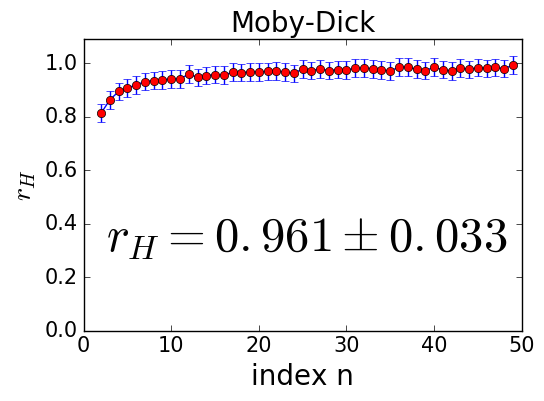

In [5]:
V, H = geometric_sequence(word, syl)
max_range = 50 #the number of elements in the sequence you want to know
x = 'H'
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'png' #the format of your picture
shift = 'N' #If you don't want to measure shift, just assign shift != 'T'.


def which_plot(x = 'H', SP = 'T', FORMAT = 'png', max_range = 50, shift = 'N'):
    if x == 'H':
        if len(H) < max_range + 4:
            max_range = len(H) - 5
        r = np.zeros(max_range - 2)
        
        if shift == 'T':
            def r_H_shift(x_0, h):
                h = np.array(h)
                r_shift = (h[2:max_range] - x_0)/ (h[1:max_range - 1] - x_0)
                std = np.sqrt(np.mean((r_shift - r_shift.mean())**2))
                return std
            
            #To get the value minimize std of r_shift, we don't use minimize() here because 
            #there are some problems in its algorithm. Instead, we use the Brute-force search
            find_r = []
            for x_0 in range(0, int(H[0]/2)):
                find_r.append(r_H_shift(x_0, H))
            SHIFT = find_r.index(min(find_r)) + 1
            h = np.array(H)
            r = (h[2:max_range] - SHIFT)/ (h[1:max_range -1] - SHIFT)
            
            plt.ylabel('$\sigma_H(x_0)$', size = 15)
            plt.xlabel('shift $x_0$', size = 15)
            plt.text(SHIFT + 50, min(find_r) ,'$x_0=%d$' % SHIFT, fontsize = 20)
            plt.plot(find_r)
            plt.yscale('log')
            plt.show()
            

        elif shift != 'T': 
            SHIFT = 0
            for i in range(1, max_range - 1): #H[0]=H_1, H[1]=H_2
                r[i - 1] = H[i + 1]/ H[i]
        
        
        r_position = [i + 2 for i in range(len(r))] #we start from H_2
        STD = round(np.std(r), 3)
        MEAN = round(np.mean(r), 3)
        fig, ax = plt.subplots()
        ax.errorbar(r_position, r, yerr = STD) #plot errorbar 
        plt.text(max_range / 20, 0.3, '$r_H=%.3f\pm %.3f$' % (MEAN, STD), fontsize=35)        
        
        plt.title(name, size = 20)
        ax.tick_params(axis='x', labelsize=15) 
        ax.tick_params(axis='y', labelsize=15)
        plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
        plt.xlabel('index n', size = 20)
        plt.ylabel('$r_H$', size = 20)
        plt.ylim([0, max(r) + 0.1])
        plt.plot(r_position, r, 'ro')        
        if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
            fig.savefig('H of ' + name + '.' + FORMAT, dpi = 1000, format = FORMAT)
        plt.show()
        return MEAN, STD, SHIFT
    elif x == 'V':
        if len(V) < max_range + 4:
            max_range = len(V) - 5
        r = np.zeros(max_range - 2)
        
        if shift == 'T':
            def r_V_shift(x_0, v):
                v = np.array(v)
                r_shift = (v[2:max_range] - x_0)/ (v[1:max_range - 1] - x_0)
                std = np.sqrt(np.mean((r_shift - r_shift.mean())**2))
                return std
            
            #To get the value minimize std of r_shift, we don't use minimize() here because 
            #there are some problems in its algorithm. Instead, we use the Brute-force search
            find_r = []
            for x_0 in range(0, int(V[0]/2)):
                find_r.append(r_V_shift(x_0, V))
            SHIFT = find_r.index(min(find_r)) + 1
            v = np.array(V)
            r = (v[2:max_range] - SHIFT)/ (v[1:max_range -1] - SHIFT)
            plt.text(SHIFT + 50, min(find_r) ,'$x_0=%d$' % SHIFT, fontsize = 20)
            plt.ylabel('$\sigma_V(x_0)$', size = 15)
            plt.xlabel('shift $x_0$', size = 15)
            plt.plot(find_r)
            plt.yscale('log')
            plt.show()

        
        elif shift != 'T': 
            SHIFT = 0
            for i in range(1, max_range - 1): #V[0]=V_1, V[1]=V_2
                print(V[i], V[i+1])
                r[i - 1] = V[i + 1] / V[i]
                
        r_position = [i + 2 for i in range(len(r))] #we start from V_2
        STD = round(np.std(r), 3)
        MEAN = round(np.mean(r), 3)
        fig, ax = plt.subplots()
        ax.errorbar(r_position, r, yerr = STD) #plot errorbar
        plt.text(max_range / 20, 0.3, '$r_V=%.3f\pm %.3f$' % (MEAN, STD), fontsize=35)
        
        plt.title(name, size = 20)
        ax.tick_params(axis='x', labelsize=15) 
        ax.tick_params(axis='y', labelsize=15)
        plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
        plt.xlabel('index n', size = 20)
        plt.ylabel('$r_V$', size = 20)
        plt.ylim([0, max(r) + 0.1])
        plt.plot(r_position, r, 'ro')        
        if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
            fig.savefig('V of ' + name + '.' + FORMAT, dpi = 1000, format = FORMAT)
        plt.show()
        return MEAN, STD, SHIFT
    else:
        print('please chose x = \'H\' or \'V\'')



        
RH = which_plot(x, SP, FORMAT, max_range, shift)

<font color='blue' size='4'><b>Heaps Law </b><br></font>

wiki: https://en.wikipedia.org/wiki/Heaps%27_law<br>

$V_R(n)=Kn^{\beta}$

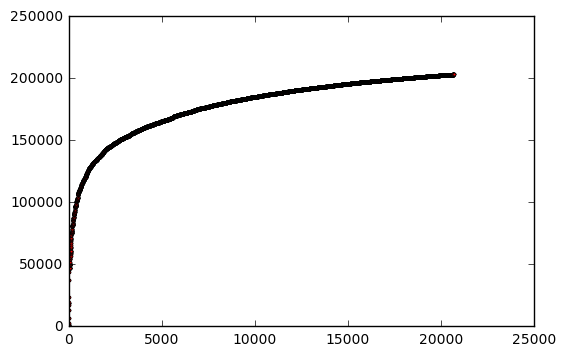

In [6]:
Seqword = word.sort_values(by='wordSeqOrder', ascending = True)
Seqword = Seqword.reset_index(drop = True)
Heaps = {}
Heaps['Seq'] = [0 for i in range(len(Seqword['wordSeqOrder']))]
Heaps['freq'] = [0 for i in range(len(Seqword['wordSeqOrder']))]

Counts = 0
C = []
for i in range(len(Seqword['wordFreq'])):
    Counts += Seqword['wordFreq'][i]
    Heaps['freq'][i] = Counts
    Heaps['Seq'][i] = Seqword['wordSeqOrder'][i]

plt.plot(Heaps['Seq'], Heaps['freq'], 'ro', markersize = 2)
plt.show()

<font color='blue' size='4'><b>draw RRD plot </b><br></font>

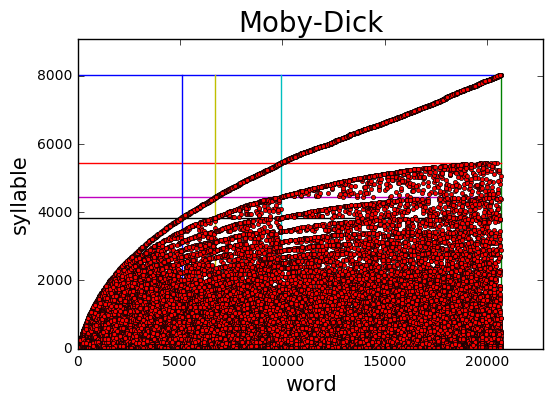

In [7]:
need_line = 'Y'
number_of_lines = 4
Color = '#ff0000'
SP = 'T' #If you don't want to save picture, just assign SP != 'T'
FORMAT = 'png' #the format of your picture

'''draw the RRD plot and auxiliary lines

Controllable parameters:
---
need_line: 
    If you don't want the auxiliary lines, change Y into other thing.

number_of_lines: 
    How many auxiliary lines you need ? (both horizontal and vertical lines)

Color: color code , default = '#ff0000'
    color of your point

Save: string
    If you want to save your RRD plot, let save = the format you want. Most backends support png, pdf, ps, eps and svg.

'''


draw_RRD_plot(big, word, syl, longest, name, V, H, need_line, number_of_lines, Color, SP , FORMAT)

<font color='blue' size='4'><b> draw FRD plot of words and syllables </b><br></font>
If you want to save picture, pleast assign SP = 'T'.<br>
FORMAT is used to decide the format of your picture.

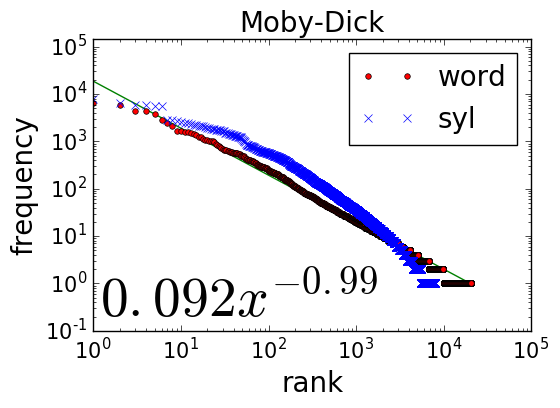

In [8]:
SP = 'T' #If you want to save picture, pleast assign SP = 'T'
FORMAT = 'png' #the format of your picture
x_pos = 0
y_pos = 0

def FRD_plot(name, word, syl, x_pos = 2, y_pos = 10, SP = 'T', FORMAT = 'png'):
    '''draw FRD plot of words and syllables

       parameters:
    0. name: str
       "XXX" (your file name without filename extension)

    1. word, syl: pd.daframe
       output of function info() or N_gram_info() in count.py
       you should get them from
       big, char, word, longest = info(filename, encode)

    2. x_pos, y_pos : number
       (x_position, y_position) of your formula on FRD plot

    3. SP: str
       If you don't want to save picture, just assign SP != 'T'.

    5. FORMAT: str
       'png', 'pdf', 'ps', 'eps' and 'svg'
    '''
    wf = word['wordFreq']
    cf = syl['sylFreq']
    max_wf = wf[0]
    max_cf = cf[0]

    #use MLE to get the fitting parameter, detial read: Curve_Fitting_MLE
    #-----------------------------------------
    T = ([],[])
    for i in word['wordRank']:
        T[0].append(i)
    for i in wf:
        T[1].append(i)
    #T = ([wordRank], [wordFreq])
    Y = Two_to_One(T)
    res = minimize(L_Zipf, 1.2, Y, method = 'SLSQP')
    s = res['x']
    t = [int(min(T[0])), int(max(T[0])), s]
    C = 1 / incomplete_harmonic(t)
    fig, ax = plt.subplots()
    plt.xlabel('rank', size = 20)
    plt.ylabel('frequency', size = 20)
    plt.title(name, fontsize = 20)

    xdata = np.linspace(min(T[0]), max(T[0]), num = (max(T[0]) - min(T[0]))*10)
    theo = Zipf_law(xdata, s, C) #Notice theo is normalized, i.e, the probability density
    N = sum(T[1])
    theo = [N * i for i in theo] #change theo from probability density to real frequency

    #plt.text(x_position, y_position)
    if (x_pos, y_pos) == (0,0):
        x_mid = 1.2
        y_min = 0.2
        plt.text(x_mid, y_min,'$%.3fx^{-%.2f}$'%(C, s), fontsize=40) #write formula on the plot
    else:
        plt.text(x_pos, y_pos,'$%.3fx^{-%.2f}$'%(C, s), fontsize=40) #write formula on the plot
    plt.plot(xdata, theo, 'g-')
    #-----------------------------------------
    plt.ylim([0.1, 10*max(max_wf, max_cf)])
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(wf, 'ro', label='word', markersize=4)
    plt.plot(cf, 'x', label='syl', markersize=6)
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)
    plt.legend(loc = 'best', prop={'size': 20})
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('FRD of ' + name + '.' + FORMAT, dpi = 500, format = FORMAT)
    plt.show()
    return (C, s)
    
Zipf = FRD_plot(name, word, syl, x_pos, y_pos, SP, FORMAT)

<font color='blue' size='4'><b> pick up points on scaling lines </b><br></font>
The following code is used to denosing of RRD plot and find scaling lines. Step: <br>
1. chose those points in (m, n), (m+1, n+1), ... blocks <br>
2. the points in each block should be in left upper conner <br>
3. use total variation reconstruction to pick up points on scaling lines<br>

f: set, {f_1, f_2,...,f_n}, where f_k = (x_avg, y_avg), x/y_avg is points after moving average <br>
flu: set, {flu_1, flu_2,...,flu_n}, where flu_k = (lupx, lupy), lupx/y is points on scaling line <br>


detail: <br>
1. Module/count_col.py <br>
2. http://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf <br>


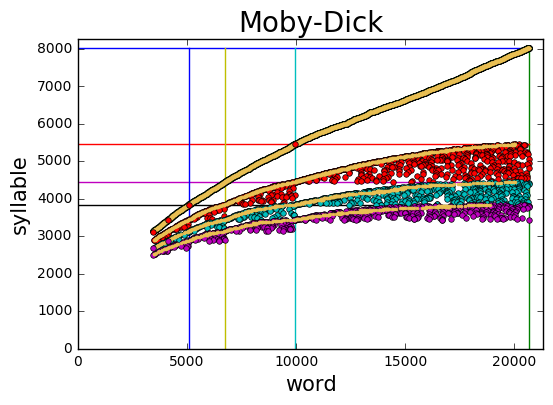

runtime: 210.0030117034912


In [9]:
tStart = time.time()
f, flu = plot_f(4, V, H, big, name, longest, toler = 50, avg_N = 50)
tEnd = time.time()
print('runtime:', tEnd - tStart)

<font color='blue' size='4'><b> calculate SP value </b><br></font>
We use moving average data to calculate $r_f$, S value and P value. <br>
If you want to pick up the points on scaling line and save them in excel, you can calculate $r_f$ of your data by "draw ratio of scaling function/Run_case_by_case.ipynb". <br>

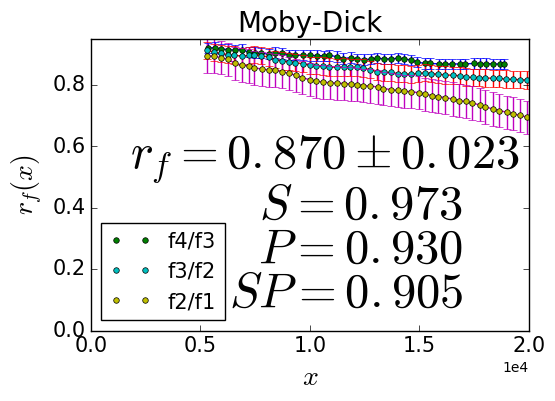

In [10]:
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'png' #the format of your picture

def rf(name, SP, FORMAT, f):
    '''plot r_f of your data
    
    ------paras
    name: str
       name of your r_f plot
    SP: str, should be 'T' or others
       If you don't want to save picture, just assign SP != 'T'.
    FORMAT: str
       format of your picture
    f: set, contain points on f1 ~ fn after moving average
       output of plot_f(n, V, H) #suggestion: use flu(non-average data), not f(average data)
       
    ------output
    x: x coordinate
    y: f_i/f_(i+1) for all i
    STD: standard error for f_i/f_(i+1)    
    if SP = 'T': a picture
    '''
    avg_N = max([len(f[i][0]) for i in f])
    lf = len(f)
    y = {}
    x = {}
    STD = {} #STD of f_i/f_(i+1)
    weight = {} #number of data of f_i/f_(i+1)
    r = {} #average ratio of f_i/f_(i+1)
    for n in range(1, lf):
        fn1 = 'f' + str(n+1)
        fn = 'f' + str(n)
        y[fn1 + '/' + fn] = [f[fn1][1][j]/f[fn][1][j] for j in range(avg_N)]
        x[fn1 + '/' + fn] = [0.5*f[fn1][0][j] + 0.5*f[fn][0][j] for j in range(avg_N)]
        
        y_n = [i for i in y[fn1 + '/' + fn] if i==i] # this is y without NAN
        STD[fn1 + '/' + fn] = round(np.std(y_n), 3)
        weight[fn1 + '/' + fn] = len(y_n)
        r[fn1 + '/' + fn] = round(np.mean(y_n), 3)
    
    fig, ax = plt.subplots()
    #calculate SP value excluding f2/f1
    error = {}
    for i in STD:
        if i != 'f2/f1':
            error[i] = STD[i]
    del weight['f2/f1'], r['f2/f1']
    tot = sum([weight[w] for w in weight])
    R = sum([weight[i]*r[i]/tot for i in weight])
    ERROR = (sum([weight[i]*error[i]**2/tot for i in weight]))**0.5
    EE = (sum([weight[i]*error[i]/tot for i in weight]))
    
    
    P = {}
    for i in x:
        px = x[i]
        py = y[i]
        std = STD[i]
        if i != 'f2/f1':
            P[i] = weight[i]/len(py)
            if P[i] < 0.8:
                print('P < 0.8: %s, %f' % (i, P[i]))
        ax.errorbar(px, py, yerr = std) #plot errorbar
        plt.plot(px, py,'o', markersize = '4', label = i)
        plt.legend(loc = 'best', prop = {'size': 15})
    
    P_value = np.mean([P[i] for i in P])
    S_value = 1 - ERROR/R
    
    xmin, xmax = plt.xlim([0,None])
    ymin, ymax = plt.ylim([0,None])
    plt.text(xmax*0.98, ymax*0.5, '$r_f=%.3f\pm %.3f$' % (R,ERROR), fontsize=35, verticalalignment='bottom', horizontalalignment='right')
    plt.text(xmax*0.85, ymax*0.35, '$S=%.3f$' % (S_value), fontsize=35, verticalalignment='bottom', horizontalalignment='right')
    plt.text(xmax*0.85, ymax*0.2, '$P=%.3f$' % (P_value), fontsize=35, verticalalignment='bottom', horizontalalignment='right')
    plt.text(xmax*0.85, ymax*0.05, '$SP=%.3f$' % (S_value*P_value), fontsize=35, verticalalignment='bottom', horizontalalignment='right')
    plt.xlabel('$x$', size = 20)
    plt.ylabel('$r_f(x)$', size = 20)
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)
    #https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.ticklabel_format.html
    ax.ticklabel_format(axis='x', style='sci',scilimits=(0,3))
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    plt.title(name, size = 20)
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('rf of ' + name + '.' + FORMAT, dpi = 300, format = FORMAT)
    plt.show()
    return (R, ERROR)
    
Rf = rf(name, SP, FORMAT, f)




<font color='blue' size='4'><b> scaling fitting </b><br></font>
find out best fitting curve for scaling lines <br>
    select f1~fn to be basis of scaling function, after that find out the best basis and parameters
    by check deviation of different basis.
    
    For instance, use f2 to be basis
    0. fitting f2 with theory model
    1. f1 = f2/Rf, f3 = Rf*f2, f4 = Rf^2*f2......
    2. tot_Dev['f2'] = sum((y_i - f_i)**2), where y_i is real data and f_i is fitting data
    3. check all possible and resonable basis, findout the smallest tot_Dev['fn'] 

detail: Module/count_col.py <br> 

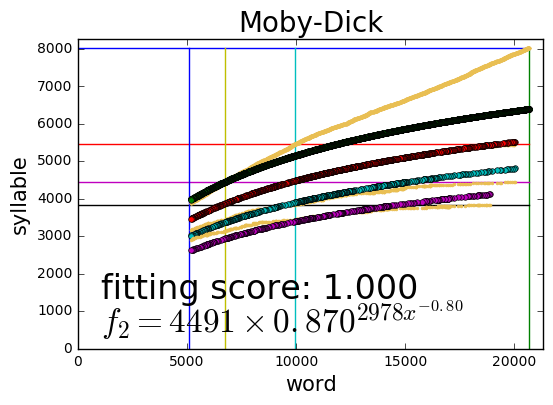

fitting range = [5171, 20687]


(array([  1.01249560e+04,   2.85114419e+02,   4.21670129e-01]),
 array([[  2.00646762e+04,  -2.04696952e+03,  -1.04680440e+00],
        [ -2.04696952e+03,   2.11152965e+02,   1.07668305e-01],
        [ -1.04680440e+00,   1.07668305e-01,   5.49431227e-05]]))

In [11]:
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'png' #the format of your picture

def fit_with_cut(data, Rf, V, H, name, SP, FORMAT):
    '''
    fit data bigger than 0.25*V[0] to rise accuracy of fitting
    if 0.25*V[0] is not small enough, lowering the low bound of data automatically
    '''
    data_range = [0.25 - i*0.01 for i in range(26)]
    check = 0
    for dr in data_range:
        try:
            D = {}
            for fn in data:
                b = [[],[]]                
                for i in range(len(data[fn][0])):        
                    if data[fn][0][i] >= dr*V[0]:
                        b[0].append(data[fn][0][i])
                        b[1].append(data[fn][1][i])
                D[fn] = (b[0], b[1])
            fit_para = scaling_fit(D, Rf, V, H, name, SP, FORMAT) #detail: Module/count_col.py
            print('fitting range = [%d, %d]' % (dr*V[0], V[0]))
            check = 1
            return fit_para
            break
        except RuntimeError:
            pass
    if check == 0 :
        print('Can not find best parameters in data range.')

fit_with_cut(flu, Rf[0], V, H, name, SP, FORMAT)

<font color='blue' size='4'><b> draw collocation-rank plot </b><br></font>
If you want to save picture, pleast assign SP = 'T'.<br>
FORMAT is used to decide the format of your picture.

<ref>Reference<br>
1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
2. https://lmfit.github.io/lmfit-py/intro.html

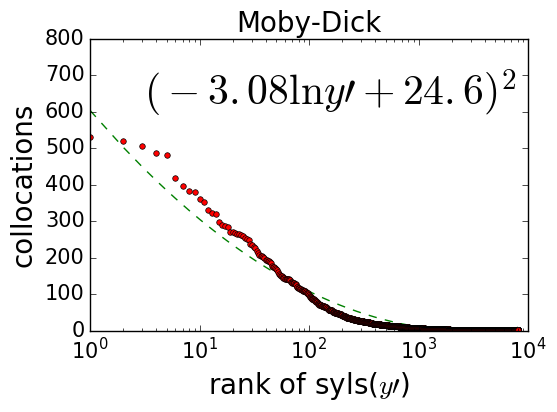

In [12]:
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'png' #the format of your picture
x_pos = 0 #auto positioning = 0; otherwise change the value you want
y_pos = 0 #auto positioning = 0; otherwise change the value you want

def Col_plot(name, syl, x_pos = 10, y_pos = 0, SP = 'T', FORMAT = 'png'):
    '''draw FRD plot of words and syllables

       parameters:
    0. name: str
       "XXX" (your file name without filename extension)

    1. char: pd.daframe
       output of function info() or N_gram_info() in count.py
       you should get them from
       big, syl, word, longest = info(filename, encode)

    2. x_pos, y_pos : number
       (x_position, y_position) of your formula on FRD plot

    3. SP: str
       If you don't want to save picture, just assign SP != 'T'.

    5. FORMAT: str
       'png', 'pdf', 'ps', 'eps' and 'svg'
    '''
    Syl = syl.sort_values(by='#collocations', ascending=False)
    reSyl = Syl.reset_index()

    #use OLS to get the fitting parameter
    #-----------------------------------------
    def col(y, a, b):
        return (a * np.log(y) + b) ** 2

    popt, pcov = curve_fit(col, syl['sylRank'], reSyl['#collocations'])
    #popt is the optimal values for the parameters (a,b)
    theo = col(syl['sylRank'], *popt)
    fig, ax = plt.subplots()
    plt.plot(syl['sylRank'], theo, 'g--')
    
    a = 7   #auto positioning, m = min(syl['sylRank']) = 1 always
    b = 1   #auto positioning, M = max(syl['sylRank'])
    xmid = max(syl['sylRank'])**(b/(a+b))  #exp([a*log(m)+b*log(M)]/[a+b]) = m^(a/[a+b]) * M^(b/[a+b])    
    ytop = max(reSyl['#collocations'])*5/6
    
    #the following code deal with significant figures of fitting parameters
    #the tutor of significant figures: https://www.usna.edu/ChemDept/_files/documents/manual/apdxB.pdf
    #-----------------------------------------
    col_dig = len(str(max(reSyl['#collocations'])))
    yp_dig = len(str(max(syl['sylRank']))) #ln(y') will have yp_dig +1 digits (yp_dig significant figures)
    a_dig = min(col_dig, yp_dig +1) #significant figures of parameter a
    b_dig = col_dig #significant figures of parameter b
    
    # the fomat string is #.?g, where ? = significant figures
    # detail of the fomat string: https://bugs.python.org/issue32790
    # https://docs.python.org/3/tutorial/floatingpoint.html
    A = format(popt[0], '#.%dg' % a_dig)  # give a_dig significant digits
    B = format(popt[1], '#.%dg' % b_dig)  # give b_dig significant digits
    if 'e' in A: #make scientific notation more beautiful
        A = A.split('e')[0] + '\\times 10^{' + str(int(A.split('e')[1])) + '}'
    if A[-1] == '.':
        A = A[:-1]
    if 'e' in B: #make scientific notation more beautiful
        B = B.split('e')[0] + '\\times 10^{' + str(int(B.split('e')[1])) + '}'
    if B[-1] == '.':
        B = B[:-1]
        
    equation_string = '$(%s\ln{y\prime}+%s)^2$' % (A, B)    
    
    if x_pos != 0 and y_pos != 0:
        plt.text(x_pos, y_pos, equation_string, fontsize=30)
    elif x_pos != 0 and y_pos == 0:
        plt.text(x_pos, ytop, equation_string, fontsize=30)
    elif x_pos == 0 and y_pos != 0:
        plt.text(xmid, y_pos, equation_string, fontsize=30)
    else:
        plt.text(xmid, ytop, equation_string, fontsize=30)
    #-----------------------------------------

    plt.plot(reSyl['#collocations'], 'ro', label = 'syl', markersize=4)
    plt.xlabel('rank of syls($y\prime$)', size = 20)
    plt.xscale('log')
    plt.ylabel('collocations', size = 20)
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    plt.title(name, fontsize = 20)
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('collocation_' + name + '.' + FORMAT, dpi = 500, format = FORMAT)
    plt.show()
    
Col_plot(name, syl, x_pos, y_pos, SP, FORMAT)

<font color='blue' size='4'><b> draw link-rank plot </b><br></font>

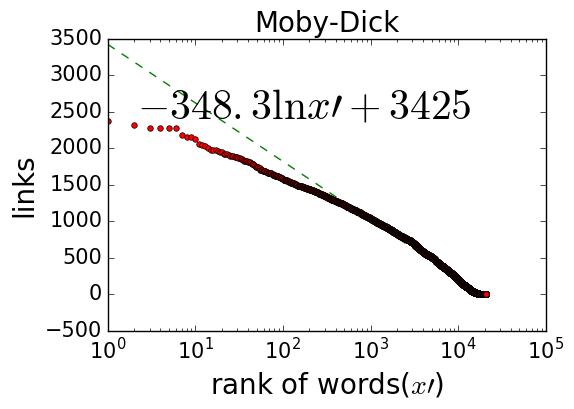

In [13]:
SP = 'T' #If you don't want to save picture, just assign SP != 'T'.
FORMAT = 'png' #the format of your picture
x_pos = 0 #auto positioning = 0; otherwise change the value you want
y_pos = 0 #auto positioning = 0; otherwise change the value you want

def Link_plot(name, word, x_pos = 20, y_pos = 0, SP = 'T', FORMAT = 'png'):
    '''draw collocation-rank plot 

       parameters:
    0. name: str
       "XXX" (your file name without filename extension)

    1. char: pd.daframe
       output of function info() or N_gram_info() in count.py
       you should get them from
       big, char, word, longest = info(filename, encode)

    2. x_pos, y_pos : number
       (x_position, y_position) of your formula on FRD plot

    3. SP: str
       If you don't want to save picture, just assign SP != 'T'.

    5. FORMAT: str
       'png', 'pdf', 'ps', 'eps' and 'svg'
    '''
    Word = word.sort_values(by='#links', ascending=False)
    reWord = Word.reset_index()

    #use OLS to get the fitting parameter
    #-----------------------------------------
    def link(x, a, b):
        return (a * np.log(x) + b)

    popt, pcov = curve_fit(link, word['wordRank'], reWord['#links'])
    #popt is the optimal values for the parameters (a,b)
    theo = link(word['wordRank'], *popt)
    fig, ax = plt.subplots()
    plt.plot(word['wordRank'], theo, 'g--')
    
    a = 12   #auto positioning, m = min(word['wordRank'])
    b = 1   #auto positioning, M = max(word['wordRank'])
    xmid = max(word['wordRank']) ** (b/(a+b))  #exp([a*log(m)+b*log(M)]/[a+b]) = m^(a/[a+b]) * M^(b/[a+b])
    ytop = max(reWord['#links']) 
    
    #the following code deal with significant figures of fitting parameters
    #the tutor of significant figures: https://www.usna.edu/ChemDept/_files/documents/manual/apdxB.pdf
    #-----------------------------------------
    link_dig = len(str(max(reWord['#links'])))
    xp_dig = len(str(max(word['wordRank']))) #ln(x') will have xp_dig +1 digits (xp_dig significant figures)
    a_dig = min(link_dig, xp_dig +1) #significant figures of parameter a
    b_dig = link_dig #significant figures of parameter b
    
    # the fomat string is #.?g, where ? = significant figures
    # detail of the fomat string: https://bugs.python.org/issue32790
    # https://docs.python.org/3/tutorial/floatingpoint.html
    A = format(popt[0], '#.%dg' % a_dig)  # give a_dig significant digits
    B = format(popt[1], '#.%dg' % b_dig)  # give b_dig significant digits
    if 'e' in A: #make scientific notation more beautiful
        A = A.split('e')[0] + '\\times 10^{' + str(int(A.split('e')[1])) + '}'
    if A[-1] == '.':
        A = A[:-1]
    if 'e' in B: #make scientific notation more beautiful
        B = B.split('e')[0] + '\\times 10^{' + str(int(B.split('e')[1])) + '}'
    if B[-1] == '.':
        B = B[:-1]    
    
    equation_string = '$%s\ln{x\prime}+%s$' % (A, B)

    if x_pos != 0 and y_pos != 0:
        plt.text(x_pos, y_pos, equation_string, fontsize=30) 
    elif x_pos != 0 and y_pos == 0:
        plt.text(x_pos, ytop, equation_string, fontsize=30) 
    elif x_pos == 0 and y_pos != 0:
        plt.text(xmid, y_pos, equation_string, fontsize=30) 
    else:
        plt.text(xmid, ytop, equation_string, fontsize=30) 

    #-----------------------------------------

    plt.plot(reWord['#links'], 'ro', label='word', markersize=4)
    plt.xlabel('rank of words($x\prime$)', size = 20)
    plt.xscale('log')
    plt.ylabel('links', size = 20)
    ax.tick_params(axis='x', labelsize=15) 
    ax.tick_params(axis='y', labelsize=15)
    plt.title(name, fontsize = 20)
    #https://stackoverflow.com/questions/6774086/why-is-my-xlabel-cut-off-in-my-matplotlib-plot
    plt.gcf().subplots_adjust(left = 0.17, bottom = 0.17)
    if (SP == 'T') and (FORMAT == 'png' or 'pdf' or 'ps' or 'eps' or 'svg'):
        fig.savefig('links_' + name + '.' + FORMAT, dpi = 500, format = FORMAT)
    plt.show()
    
Link_plot(name, word, x_pos, y_pos, SP, FORMAT)

<font color='blue' size='4'><b>draw collocation distribution plot </b><br></font>

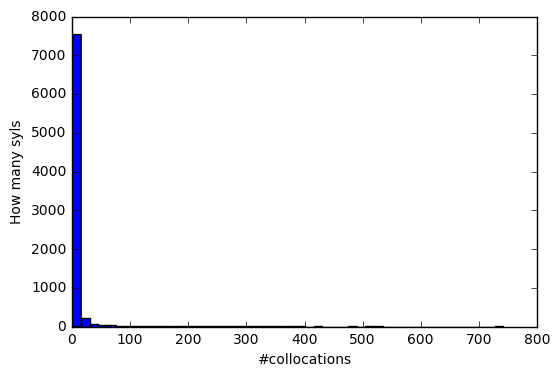

In [14]:
x = syl['#collocations']
plt.hist(x, 50)
plt.xlabel("#collocations")
plt.ylabel('How many syls')

<font color='blue' size='4'><b>draw link distribution plot </b><br></font>

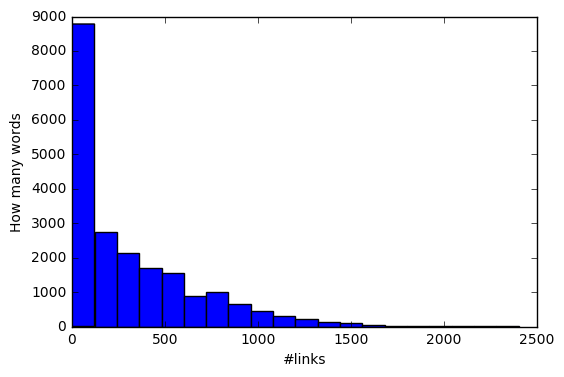

In [15]:
x = word['#links']
plt.hist(x, 20)
plt.xlabel("#links")
plt.ylabel('How many words')